In [9]:
import numpy as np
import json 
# import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle

import matplotlib.pyplot as plt

In [10]:
objects = ['backgrounds', 'airplane', 'animal', 'arm', 'bag', 'banana', 'basket', 'beach', 'bear', 'bed', 'bench', 'bike', 'bird', 'board', 'boat', 'book', 'boot', 'bottle', 'bowl', 'box', 'boy', 'branch', 'building', 'bus', 'cabinet', 'cap', 'car', 'cat', 'chair', 'child', 'clock', 'coat', 'counter', 'cow', 'cup', 'curtain', 'desk', 'dog', 'door', 'drawer', 'ear', 'elephant', 'engine', 'eye', 'face', 'fence', 'finger', 'flag', 'flower', 'food', 'fork', 'fruit', 'giraffe', 'girl', 'glass', 'glove', 'guy', 'hair', 'hand', 'handle', 'hat', 'head', 'helmet', 'hill', 'horse', 'house', 'jacket', 'jean', 'kid', 'kite', 'lady', 'lamp', 'laptop', 'leaf', 'leg', 'letter', 'light', 'logo', 'man', 'men', 'motorcycle', 'mountain', 'mouth', 'neck', 'nose', 'number', 'orange', 'pant', 'paper', 'paw', 'people', 'person', 'phone', 'pillow', 'pizza', 'plane', 'plant', 'plate', 'player', 'pole', 'post', 'pot', 'racket', 'railing', 'rock', 'roof', 'room', 'screen', 'seat', 'sheep', 'shelf', 'shirt', 'shoe', 'short', 'sidewalk', 'sign', 'sink', 'skateboard', 'ski', 'skier', 'sneaker', 'snow', 'sock', 'stand', 'street', 'surfboard', 'table', 'tail', 'tie', 'tile', 'tire', 'toilet', 'towel', 'tower', 'track', 'train', 'tree', 'truck', 'trunk', 'umbrella', 'vase', 'vegetable', 'vehicle', 'wave', 'wheel', 'window', 'windshield', 'wing', 'wire', 'woman', 'zebra']

In [64]:
predicates = ['backgrounds', 'above', 'across', 'against', 'along', 'and', 'at', 'attached to', 'behind', 'belonging to', 'between', 'carrying', 'covered in', 'covering', 'eating', 'flying in', 'for', 'from', 'growing on', 'hanging from', 'has', 'holding', 'in', 'in front of', 'laying on', 'looking at', 'lying on', 'made of', 'mounted on', 'near', 'of', 'on', 'on back of', 'over', 'painted on', 'parked on', 'part of', 'playing', 'riding', 'says', 'sitting on', 'standing on', 'to', 'under', 'using', 'walking in', 'walking on', 'watching', 'wearing', 'wears', 'with']

In [70]:
cls_bg_num_list = [3043905, 6712, 171, 208, 379, 504, 1829,
                1413, 10011, 644, 394, 1603, 397, 460,
                565, 4, 809, 163, 157, 663, 67144,
                10764, 21748, 3167, 752, 676, 364, 114,
                234, 15300, 31347, 109355, 333, 793, 151,
                601, 429, 71, 4260, 44, 5086, 2273,
                299, 3757, 551, 270, 1225, 352, 47326,
                4810,  11059]

pred_prop = np.array(cls_bg_num_list)
pred_prop = pred_prop/pred_prop.sum()
pred_idx = pred_prop.argsort()[::-1].astype(int)

predicates = np.array(predicates)

In [71]:
pred_idx

array([ 0, 31, 20, 48, 30, 22, 29, 50, 21,  8,  1, 40, 49, 38, 43, 23, 41,
        6, 11,  7, 46, 16, 33, 24, 25, 19,  9, 35, 14, 44,  5, 13, 36, 12,
       10,  4, 26, 47, 32, 42, 45, 28,  3,  2, 17, 18, 34, 27, 37, 39, 15])

In [72]:
pred_prop

array([8.91165244e-01, 1.96507484e-03, 5.00637361e-05, 6.08962404e-05,
       1.10959977e-04, 1.47556275e-04, 5.35477037e-04, 4.13684556e-04,
       2.93092434e-03, 1.88544129e-04, 1.15351532e-04, 4.69310930e-04,
       1.16229843e-04, 1.34674378e-04, 1.65415268e-04, 1.17108155e-06,
       2.36851243e-04, 4.77215730e-05, 4.59649507e-05, 1.94106766e-04,
       1.96577748e-02, 3.15138044e-03, 6.36717037e-03, 9.27203814e-04,
       2.20163331e-04, 1.97912781e-04, 1.06568421e-04, 3.33758241e-05,
       6.85082705e-05, 4.47938692e-03, 9.17747331e-03, 3.20159056e-02,
       9.74925387e-05, 2.32166917e-04, 4.42083284e-05, 1.75955002e-04,
       1.25598496e-04, 2.07866975e-05, 1.24720185e-03, 1.28818970e-05,
       1.48903019e-03, 6.65467089e-04, 8.75383456e-05, 1.09993834e-03,
       1.61316483e-04, 7.90480044e-05, 3.58643724e-04, 1.03055176e-04,
       1.38556513e-02, 1.40822556e-03, 3.23774771e-03])

In [73]:
pred_prop[pred_idx[1:]]

array([3.20159056e-02, 1.96577748e-02, 1.38556513e-02, 9.17747331e-03,
       6.36717037e-03, 4.47938692e-03, 3.23774771e-03, 3.15138044e-03,
       2.93092434e-03, 1.96507484e-03, 1.48903019e-03, 1.40822556e-03,
       1.24720185e-03, 1.09993834e-03, 9.27203814e-04, 6.65467089e-04,
       5.35477037e-04, 4.69310930e-04, 4.13684556e-04, 3.58643724e-04,
       2.36851243e-04, 2.32166917e-04, 2.20163331e-04, 1.97912781e-04,
       1.94106766e-04, 1.88544129e-04, 1.75955002e-04, 1.65415268e-04,
       1.61316483e-04, 1.47556275e-04, 1.34674378e-04, 1.25598496e-04,
       1.16229843e-04, 1.15351532e-04, 1.10959977e-04, 1.06568421e-04,
       1.03055176e-04, 9.74925387e-05, 8.75383456e-05, 7.90480044e-05,
       6.85082705e-05, 6.08962404e-05, 5.00637361e-05, 4.77215730e-05,
       4.59649507e-05, 4.42083284e-05, 3.33758241e-05, 2.07866975e-05,
       1.28818970e-05, 1.17108155e-06])

In [74]:
predicates[pred_idx[1:]]

array(['on', 'has', 'wearing', 'of', 'in', 'near', 'with', 'holding',
       'behind', 'above', 'sitting on', 'wears', 'riding', 'under',
       'in front of', 'standing on', 'at', 'carrying', 'attached to',
       'walking on', 'for', 'over', 'laying on', 'looking at',
       'hanging from', 'belonging to', 'parked on', 'eating', 'using',
       'and', 'covering', 'part of', 'covered in', 'between', 'along',
       'lying on', 'watching', 'on back of', 'to', 'walking in',
       'mounted on', 'against', 'across', 'from', 'growing on',
       'painted on', 'made of', 'playing', 'says', 'flying in'],
      dtype='<U12')

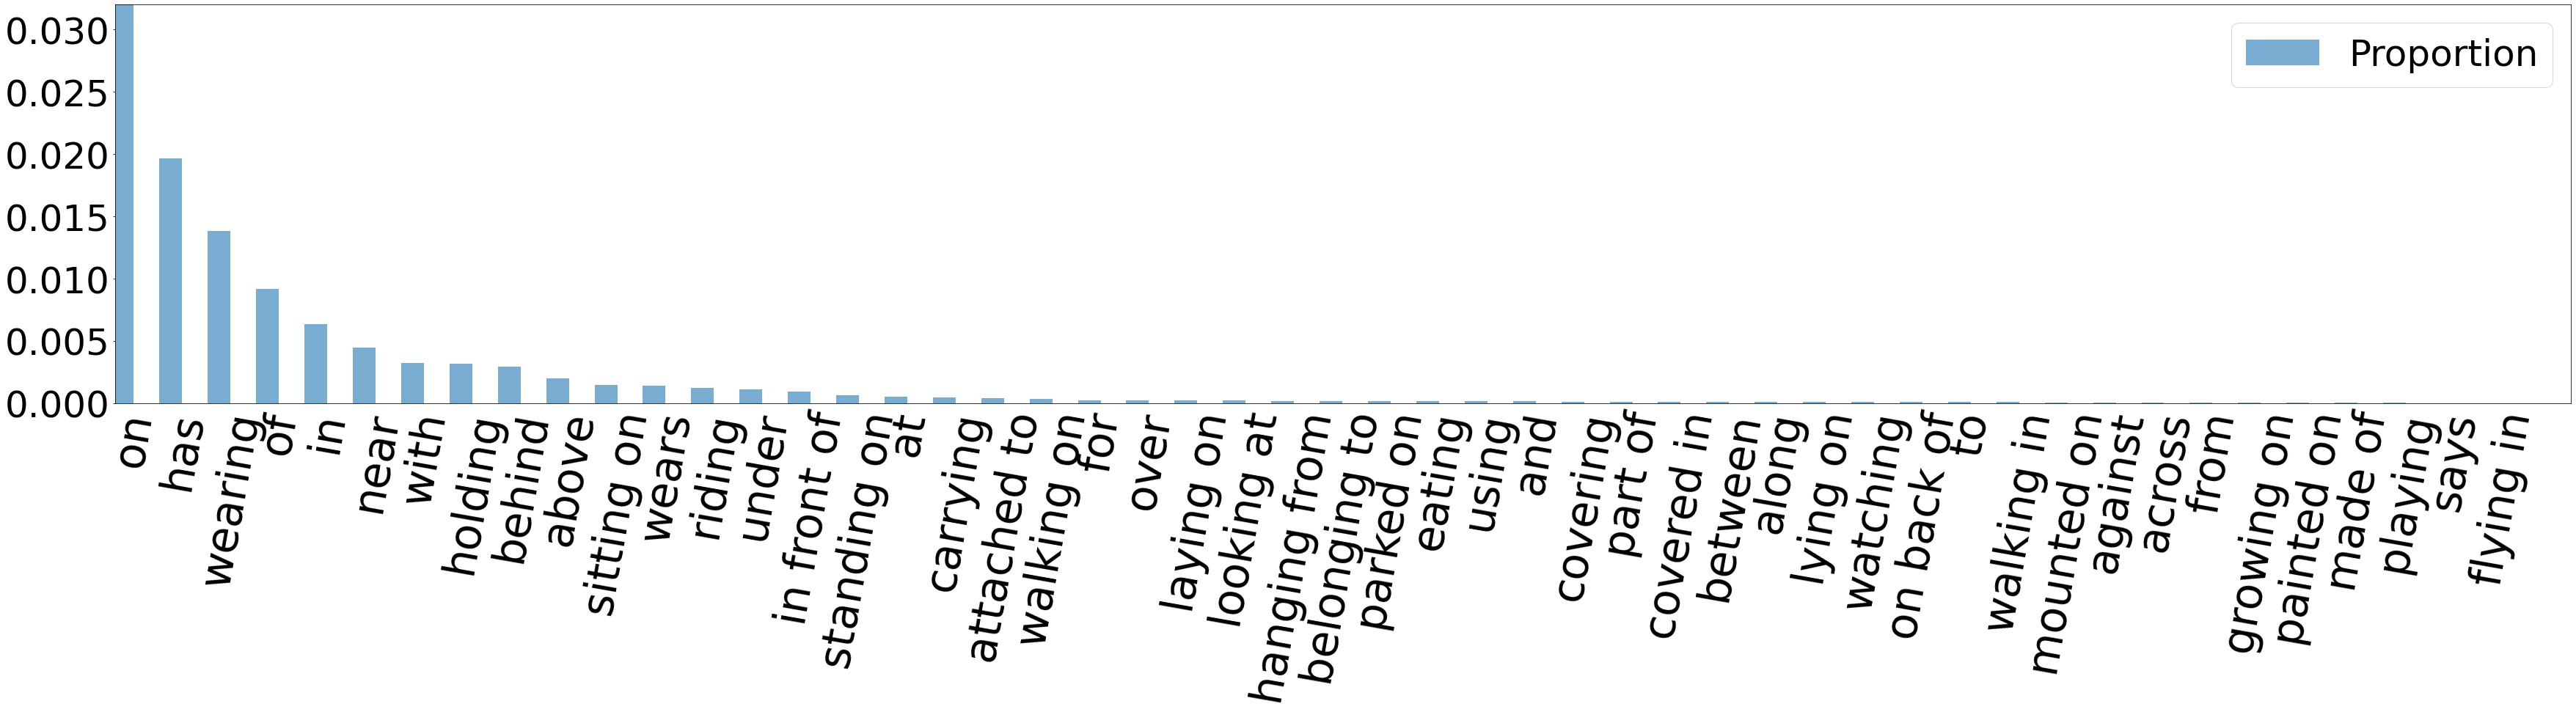

In [114]:
s_idx = 1
e_idx = 30
x = np.arange(len(predicates) - 1 )  # the label locations
width = 0.5  # the width of the bars
space = 0.03

fig, ax = plt.subplots()
rects1 = plt.bar(x - width/2, pred_prop[pred_idx[1:]], width - space, label='Proportion', color='#78ACD1')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Proportions', fontsize=30)
#ax.set_xlabel('Predicates', fontsize=30)

ax.set_xticks(x)
ax.set_xticklabels(predicates[pred_idx[1:]], rotation=80)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(60) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(50) 

#ax.set_xticklabels(labels, fontsize=16)
plt.ylim(0, pred_prop[1:].max())
plt.xlim(-0.4, len(predicates) - 1 + 0.4)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.legend(fontsize=50)
fig.set_size_inches(60, 10)
plt.savefig('predicates.pdf', format='pdf',bbox_inches='tight', pad_inches=0.1)
plt.show()